# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

In [170]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [171]:
import numpy as np
import pandas as pd

In [172]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100

A = np.arange(100).reshape((10, 10))
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [173]:
# Посчитайте средние значения в матрице по столбцам

A.mean(0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [174]:
# Транспонируйте матрицу A

A.T

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [175]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A * A.T

array([[   0,   10,   40,   90,  160,  250,  360,  490,  640,  810],
       [  10,  121,  252,  403,  574,  765,  976, 1207, 1458, 1729],
       [  40,  252,  484,  736, 1008, 1300, 1612, 1944, 2296, 2668],
       [  90,  403,  736, 1089, 1462, 1855, 2268, 2701, 3154, 3627],
       [ 160,  574, 1008, 1462, 1936, 2430, 2944, 3478, 4032, 4606],
       [ 250,  765, 1300, 1855, 2430, 3025, 3640, 4275, 4930, 5605],
       [ 360,  976, 1612, 2268, 2944, 3640, 4356, 5092, 5848, 6624],
       [ 490, 1207, 1944, 2701, 3478, 4275, 5092, 5929, 6786, 7663],
       [ 640, 1458, 2296, 3154, 4032, 4930, 5848, 6786, 7744, 8722],
       [ 810, 1729, 2668, 3627, 4606, 5605, 6624, 7663, 8722, 9801]])

In [176]:
# Посчитайте matrix product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

B = A.dot(A)

#### Не меняйте следующую ячейку. Просто запустите ее.

In [177]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [178]:
import pandas as pd

In [179]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [180]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [181]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [192]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [193]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
    train_test_split(two_class_feature_matrix, two_class_labels, test_size=0.2)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [194]:
lr_clf = Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression(solver = 'saga', max_iter=10000))])

In [195]:
lr_clf.fit(train_feature_matrix, train_labels)
y_pred = lr_clf.predict(test_feature_matrix)

accuracy = accuracy_score(y_true=test_labels, y_pred=y_pred)
f1 = f1_score(y_true=test_labels, y_pred=y_pred, average=None)

print(f"accuracy = {accuracy}")
print(f"f1 score = {f1}")

accuracy = 0.7798833819241983
f1 score = [0.72545455 0.8163017 ]


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [196]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
    train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
parameters = {'clf__C': np.linspace(0.01, 1, 10),
              'clf__penalty': ['l1', 'l2']}

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000))])

clf = GridSearchCV(pipe, param_grid=parameters, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
clf.fit(train_feature_matrix, train_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000,
                                                           multi_class='mul

In [199]:
print(clf.best_score_)
print(clf.best_params_)

0.7228125
{'clf__C': 0.12, 'clf__penalty': 'l1'}


Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [200]:
%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


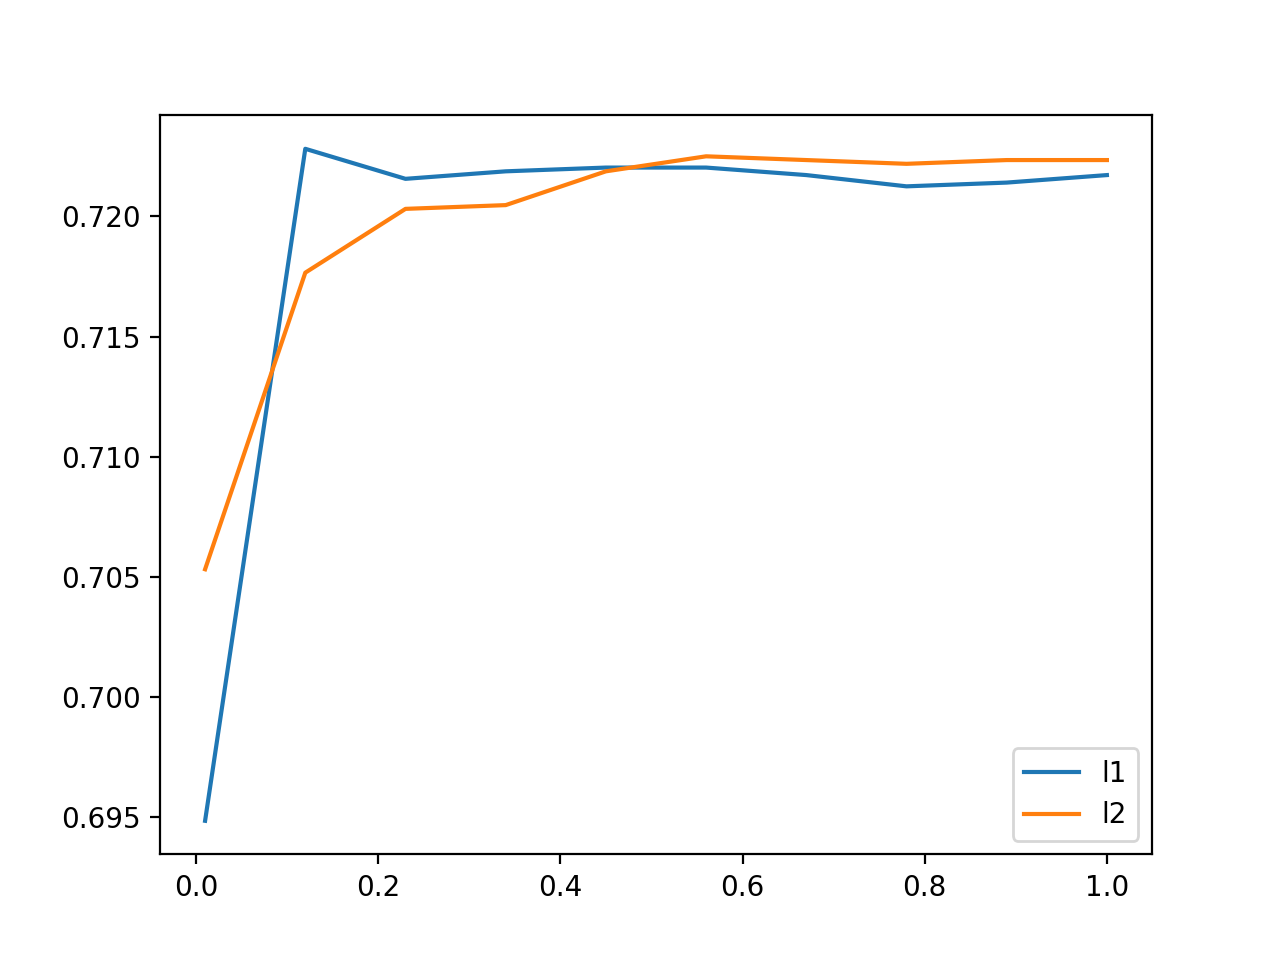

In [201]:
df = pd.DataFrame(clf.cv_results_)
l1_df = df[df['param_clf__penalty'] == 'l1']
l2_df = df[df['param_clf__penalty'] == 'l2']
fig, ax = plt.subplots()
ax.plot(np.array(l1_df['param_clf__C'], dtype=float), np.array(l1_df['mean_test_score'], dtype=float), label='l1')
ax.plot(np.array(l2_df['param_clf__C'], dtype=float), np.array(l2_df['mean_test_score'], dtype=float), label='l2')
leg = plt.legend(loc='best')

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [203]:
best_lr_clf = Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression(
            C=clf.best_params_['clf__C'], 
            penalty=clf.best_params_['clf__penalty'], 
            solver='saga', 
            multi_class='multinomial',
            max_iter=10000))])
best_lr_clf.fit(train_feature_matrix, train_labels)
proba = best_lr_clf.predict_proba(test_feature_matrix)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [204]:
proba.mean(0)

array([0.37298517, 0.48763069, 0.06192215, 0.00585693, 0.01621917,
       0.02747933, 0.02790657])

In [205]:
train_proba = []
for label in np.unique(train_labels):
    train_proba.append(sum(train_labels == label) / len(train_labels))
train_proba

[0.3715625, 0.485625, 0.05828125, 0.00515625, 0.0171875, 0.028125, 0.0340625]

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [209]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='uniform')
knn_clf.fit(train_feature_matrix, train_labels)
y_pred = knn_clf.predict(test_feature_matrix)
accuracy = accuracy_score(y_true=test_labels, y_pred=y_pred)
print(f"uniform weights accuracy = {accuracy}")

knn_clf = KNeighborsClassifier(weights='distance')
knn_clf.fit(train_feature_matrix, train_labels)
y_pred = knn_clf.predict(test_feature_matrix)
accuracy = accuracy_score(y_true=test_labels, y_pred=y_pred)
print(f"distance weights accuracy = {accuracy}")

# Accuracy is better when using distance weighed algorithm.

uniform weights accuracy = 0.7375
distance weights accuracy = 0.758125


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

In [210]:
knn_clf = KNeighborsClassifier(weights='distance')

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [212]:
parameters = {'n_neighbors': np.arange(1, 11)}

clf = GridSearchCV(knn_clf, parameters, cv=5, scoring='accuracy')
clf.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [213]:
clf.best_params_

{'n_neighbors': 6}

<IPython.core.display.Javascript object>


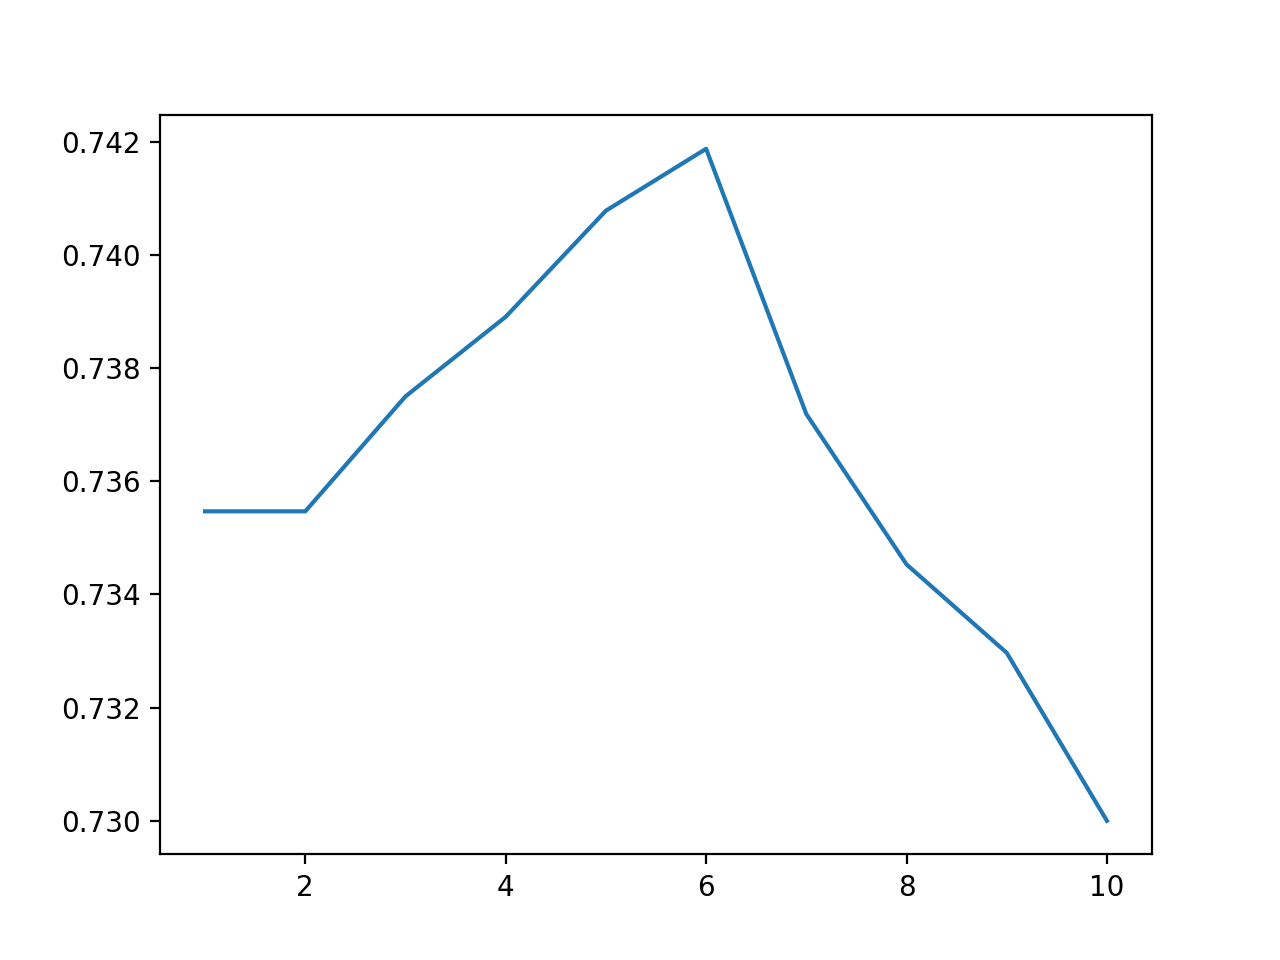

In [215]:
df = pd.DataFrame(clf.cv_results_)
fig, ax = plt.subplots()
ax.plot(np.array(df['param_n_neighbors'], dtype=float), np.array(df['mean_test_score'], dtype=float))

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [217]:
best_knn_clf = KNeighborsClassifier(n_neighbors=6, weights='distance')
best_knn_clf.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [218]:
best_knn_clf.predict_proba(test_feature_matrix)

array([[0.54984525, 0.45015475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.79305343, 0.20694657, ..., 0.        , 0.        ,
        0.        ],
       [0.85457735, 0.14542265, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43159413, 0.56840587, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69519408, 0.30480592, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30990906, 0.40592963, 0.13888112, ..., 0.14528019, 0.        ,
        0.        ]])

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [219]:
lr_pred = best_lr_clf.predict(delayed_feature_matrix)
knn_pred = best_knn_clf.predict(delayed_feature_matrix)
lr_accuracy = accuracy_score(y_true=delayed_labels, y_pred=lr_pred)
knn_accuracy = accuracy_score(y_true=delayed_labels, y_pred=knn_pred)
print(f"lr accuracy = {lr_accuracy}")
print(f"knn accuracy = {knn_accuracy}")

lr accuracy = 0.7235
knn accuracy = 0.7525


#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [220]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)